# ProdLDA

In [1]:
from octis.models.ProdLDA import ProdLDA
from octis.dataset.dataset import Dataset
from octis.evaluation_metrics.diversity_metrics import TopicDiversity
from octis.evaluation_metrics.coherence_metrics import Coherence
from octis.optimization.optimizer import Optimizer
from skopt.space.space import Real
import torch
import numpy as np
import os
from wordcloud import WordCloud
from skopt.space.space import Integer, Real
import matplotlib.pyplot as plt
import json
from tqdm import tqdm


current_directory = os.getcwd()
parent_directory = os.path.dirname(current_directory)
os.chdir(parent_directory)

from utils.graph_tools import word_frequencies_barplot_dict


/home/nicovis/anaconda3/envs/OCTIS/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
NUM_ITERS = 15
NUM_OPTIMIZATION_CALLS = 60

In [3]:
dataset = Dataset()
dataset.load_custom_dataset_from_folder('data/processed/dataset')

## Metrics

In [4]:
td, ch = TopicDiversity(topk=10), Coherence(texts = dataset.get_corpus(), topk=10, measure = 'c_v') # Initialize metric

## Prod LDA without optimization

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Device: {device}")

Device: cuda


In [6]:
model = ProdLDA(num_topics = 5, 
               activation = 'softplus', 
               dropout = 0.2,
               learn_priors = True, 
               batch_size = 64, 
               lr = 2e-3, 
               momentum = 0.99,
               solver = 'adam', 
               num_epochs = 100, 
               reduce_on_plateau = False, 
               prior_mean = 0.0,
               prior_variance = None, 
               num_layers = 2, 
               num_neurons = 64, 
               num_samples = 10,
               use_partitions = True)

In [7]:
coherence_list_no_opt, topic_diversity_list_no_opt, models_no_opt = [], [], []

for i in tqdm(range(NUM_ITERS)):
  output = model.train_model(dataset, hyperparameters=None, top_words=10)
  models_no_opt.append(output)
  coherence_list_no_opt.append(ch_score := ch.score(output))
  topic_diversity_list_no_opt.append(td_score := td.score(output))

print("Mean coherence: ", np.mean(coherence_list_no_opt), "\nMean topic diversity: ", np.mean(topic_diversity_list_no_opt))

  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: [1/100]	Samples: [1487/148700]	Train Loss: 1370.9562746931742	Time: 0:00:00.661529
Epoch: [1/100]	Samples: [319/31900]	Validation Loss: 1303.0839292711598	Time: 0:00:00.025014
Epoch: [2/100]	Samples: [2974/148700]	Train Loss: 1356.4752726756892	Time: 0:00:00.158524
Epoch: [2/100]	Samples: [319/31900]	Validation Loss: 1302.564949059561	Time: 0:00:00.014496
Epoch: [3/100]	Samples: [4461/148700]	Train Loss: 1338.0944408834903	Time: 0:00:00.163794
Epoch: [3/100]	Samples: [319/31900]	Validation Loss: 1298.6445434952977	Time: 0:00:00.026819
Epoch: [4/100]	Samples: [5948/148700]	Train Loss: 1321.6907757859785	Time: 0:00:00.174872
Epoch: [4/100]	Samples: [319/31900]	Validation Loss: 1292.6606338166143	Time: 0:00:00.015487
Epoch: [5/100]	Samples: [7435/148700]	Train Loss: 1309.5000656733355	Time: 0:00:00.192406
Epoch: [5/100]	Samples: [319/31900]	Validation Loss: 1287.7516653605016	Time: 0:00:00.015983
Epoch: [6/100]	Samples: [8922/148700]	Train Loss: 1301.8761308948385	Time: 0:00:00.160

  7%|▋         | 1/15 [00:12<02:59, 12.83s/it]

Epoch: [1/100]	Samples: [1487/148700]	Train Loss: 1369.3465923419637	Time: 0:00:00.642644
Epoch: [1/100]	Samples: [319/31900]	Validation Loss: 1303.4629702194356	Time: 0:00:00.035860
Epoch: [2/100]	Samples: [2974/148700]	Train Loss: 1351.2869740879287	Time: 0:00:00.298954
Epoch: [2/100]	Samples: [319/31900]	Validation Loss: 1300.0970317398119	Time: 0:00:00.035714
Epoch: [3/100]	Samples: [4461/148700]	Train Loss: 1332.316005642653	Time: 0:00:00.283683
Epoch: [3/100]	Samples: [319/31900]	Validation Loss: 1290.1879898119123	Time: 0:00:00.013804
Epoch: [4/100]	Samples: [5948/148700]	Train Loss: 1316.9831679240922	Time: 0:00:00.180753
Epoch: [4/100]	Samples: [319/31900]	Validation Loss: 1290.5447688087775	Time: 0:00:00.020389
Epoch: [5/100]	Samples: [7435/148700]	Train Loss: 1308.8576648663416	Time: 0:00:00.222487
Epoch: [5/100]	Samples: [319/31900]	Validation Loss: 1281.4320385971787	Time: 0:00:00.022111
Epoch: [6/100]	Samples: [8922/148700]	Train Loss: 1297.1886269544384	Time: 0:00:00.161

 13%|█▎        | 2/15 [00:21<02:12, 10.23s/it]

Epoch: [1/100]	Samples: [1487/148700]	Train Loss: 1368.2937778454943	Time: 0:00:00.557778
Epoch: [1/100]	Samples: [319/31900]	Validation Loss: 1302.9922364811912	Time: 0:00:00.029202
Epoch: [2/100]	Samples: [2974/148700]	Train Loss: 1349.5451727471418	Time: 0:00:00.288983
Epoch: [2/100]	Samples: [319/31900]	Validation Loss: 1302.6890184169279	Time: 0:00:00.026840
Epoch: [3/100]	Samples: [4461/148700]	Train Loss: 1328.808488672663	Time: 0:00:00.296395
Epoch: [3/100]	Samples: [319/31900]	Validation Loss: 1297.6336696708463	Time: 0:00:00.015505
Epoch: [4/100]	Samples: [5948/148700]	Train Loss: 1314.3678639353564	Time: 0:00:00.129754
Epoch: [4/100]	Samples: [319/31900]	Validation Loss: 1283.9503085815047	Time: 0:00:00.017965
Epoch: [5/100]	Samples: [7435/148700]	Train Loss: 1302.362243611298	Time: 0:00:00.126330
Epoch: [5/100]	Samples: [319/31900]	Validation Loss: 1271.3201410658307	Time: 0:00:00.013816
Epoch: [6/100]	Samples: [8922/148700]	Train Loss: 1293.8989031239491	Time: 0:00:00.1223

 20%|██        | 3/15 [00:28<01:44,  8.70s/it]

Epoch: [1/100]	Samples: [1487/148700]	Train Loss: 1369.5506420225286	Time: 0:00:00.580861
Epoch: [1/100]	Samples: [319/31900]	Validation Loss: 1303.085815047022	Time: 0:00:00.037272
Epoch: [2/100]	Samples: [2974/148700]	Train Loss: 1359.6250880022696	Time: 0:00:00.289332
Epoch: [2/100]	Samples: [319/31900]	Validation Loss: 1302.768588362069	Time: 0:00:00.033100
Epoch: [3/100]	Samples: [4461/148700]	Train Loss: 1342.0596629119032	Time: 0:00:00.272557
Epoch: [3/100]	Samples: [319/31900]	Validation Loss: 1302.5481240203762	Time: 0:00:00.014794
Epoch: [4/100]	Samples: [5948/148700]	Train Loss: 1327.669325561113	Time: 0:00:00.132368
Epoch: [4/100]	Samples: [319/31900]	Validation Loss: 1302.1827488244514	Time: 0:00:00.014259
Epoch: [5/100]	Samples: [7435/148700]	Train Loss: 1315.4464499621722	Time: 0:00:00.143435
Epoch: [5/100]	Samples: [319/31900]	Validation Loss: 1290.677728252351	Time: 0:00:00.016149
Epoch: [6/100]	Samples: [8922/148700]	Train Loss: 1307.3141470872563	Time: 0:00:00.121977

 27%|██▋       | 4/15 [00:39<01:45,  9.57s/it]

Epoch: [1/100]	Samples: [1487/148700]	Train Loss: 1370.6329779968057	Time: 0:00:00.592182
Epoch: [1/100]	Samples: [319/31900]	Validation Loss: 1303.2252155172414	Time: 0:00:00.037918
Epoch: [2/100]	Samples: [2974/148700]	Train Loss: 1359.5568402719402	Time: 0:00:00.308177
Epoch: [2/100]	Samples: [319/31900]	Validation Loss: 1302.379285854232	Time: 0:00:00.032922
Epoch: [3/100]	Samples: [4461/148700]	Train Loss: 1344.4198653959313	Time: 0:00:00.250568
Epoch: [3/100]	Samples: [319/31900]	Validation Loss: 1299.8952047413793	Time: 0:00:00.013629
Epoch: [4/100]	Samples: [5948/148700]	Train Loss: 1328.1837408582717	Time: 0:00:00.153310
Epoch: [4/100]	Samples: [319/31900]	Validation Loss: 1298.77784580721	Time: 0:00:00.017674
Epoch: [5/100]	Samples: [7435/148700]	Train Loss: 1315.1990085953262	Time: 0:00:00.155094
Epoch: [5/100]	Samples: [319/31900]	Validation Loss: 1295.0312989811912	Time: 0:00:00.014828
Epoch: [6/100]	Samples: [8922/148700]	Train Loss: 1306.7875388786147	Time: 0:00:00.15808

 33%|███▎      | 5/15 [00:48<01:36,  9.67s/it]

Epoch: [1/100]	Samples: [1487/148700]	Train Loss: 1370.140698554136	Time: 0:00:00.593696
Epoch: [1/100]	Samples: [319/31900]	Validation Loss: 1302.873677507837	Time: 0:00:00.041193
Epoch: [2/100]	Samples: [2974/148700]	Train Loss: 1353.5121456266813	Time: 0:00:00.313296
Epoch: [2/100]	Samples: [319/31900]	Validation Loss: 1299.2948177899686	Time: 0:00:00.027573
Epoch: [3/100]	Samples: [4461/148700]	Train Loss: 1332.765442428127	Time: 0:00:00.249618
Epoch: [3/100]	Samples: [319/31900]	Validation Loss: 1288.634379898119	Time: 0:00:00.012899
Epoch: [4/100]	Samples: [5948/148700]	Train Loss: 1318.8727355833894	Time: 0:00:00.164909
Epoch: [4/100]	Samples: [319/31900]	Validation Loss: 1288.7287911442006	Time: 0:00:00.013172
Epoch: [5/100]	Samples: [7435/148700]	Train Loss: 1308.2961683549092	Time: 0:00:00.160703
Epoch: [5/100]	Samples: [319/31900]	Validation Loss: 1287.3127938871473	Time: 0:00:00.013009
Epoch: [6/100]	Samples: [8922/148700]	Train Loss: 1300.7138639038333	Time: 0:00:00.156214

 40%|████      | 6/15 [00:57<01:22,  9.19s/it]

Epoch: [1/100]	Samples: [1487/148700]	Train Loss: 1368.8492245292534	Time: 0:00:00.573155
Epoch: [1/100]	Samples: [319/31900]	Validation Loss: 1303.0824353448277	Time: 0:00:00.043019
Epoch: [2/100]	Samples: [2974/148700]	Train Loss: 1346.527557845074	Time: 0:00:00.277871
Epoch: [2/100]	Samples: [319/31900]	Validation Loss: 1299.5270621081504	Time: 0:00:00.031997
Epoch: [3/100]	Samples: [4461/148700]	Train Loss: 1326.5052578072462	Time: 0:00:00.273693
Epoch: [3/100]	Samples: [319/31900]	Validation Loss: 1289.7019004702195	Time: 0:00:00.014783
Epoch: [4/100]	Samples: [5948/148700]	Train Loss: 1313.3470205321116	Time: 0:00:00.152283
Epoch: [4/100]	Samples: [319/31900]	Validation Loss: 1294.6512294278996	Time: 0:00:00.017235
Epoch: [5/100]	Samples: [7435/148700]	Train Loss: 1303.931146104783	Time: 0:00:00.163545
Epoch: [5/100]	Samples: [319/31900]	Validation Loss: 1283.064336794671	Time: 0:00:00.017157
Epoch: [6/100]	Samples: [8922/148700]	Train Loss: 1294.479854047579	Time: 0:00:00.156745

 47%|████▋     | 7/15 [01:04<01:09,  8.69s/it]

Epoch: [1/100]	Samples: [1487/148700]	Train Loss: 1368.933233860121	Time: 0:00:00.666112
Epoch: [1/100]	Samples: [319/31900]	Validation Loss: 1302.881857366771	Time: 0:00:00.035097
Epoch: [2/100]	Samples: [2974/148700]	Train Loss: 1354.3568833536483	Time: 0:00:00.283769
Epoch: [2/100]	Samples: [319/31900]	Validation Loss: 1302.9764645376176	Time: 0:00:00.032197
Epoch: [3/100]	Samples: [4461/148700]	Train Loss: 1334.886892127606	Time: 0:00:00.219198
Epoch: [3/100]	Samples: [319/31900]	Validation Loss: 1300.667711598746	Time: 0:00:00.014137
Epoch: [4/100]	Samples: [5948/148700]	Train Loss: 1320.8157521435776	Time: 0:00:00.156773
Epoch: [4/100]	Samples: [319/31900]	Validation Loss: 1295.5135188087775	Time: 0:00:00.014265
Epoch: [5/100]	Samples: [7435/148700]	Train Loss: 1310.2252496900219	Time: 0:00:00.164988
Epoch: [5/100]	Samples: [319/31900]	Validation Loss: 1288.2153947884012	Time: 0:00:00.020237
Epoch: [6/100]	Samples: [8922/148700]	Train Loss: 1300.5394013744115	Time: 0:00:00.168168

 53%|█████▎    | 8/15 [01:13<00:59,  8.57s/it]

Epoch: [1/100]	Samples: [1487/148700]	Train Loss: 1370.6866554409046	Time: 0:00:00.588390
Epoch: [1/100]	Samples: [319/31900]	Validation Loss: 1302.7471835815047	Time: 0:00:00.030332
Epoch: [2/100]	Samples: [2974/148700]	Train Loss: 1351.918136873739	Time: 0:00:00.297045
Epoch: [2/100]	Samples: [319/31900]	Validation Loss: 1299.7998873432603	Time: 0:00:00.031718
Epoch: [3/100]	Samples: [4461/148700]	Train Loss: 1331.135230592216	Time: 0:00:00.262476
Epoch: [3/100]	Samples: [319/31900]	Validation Loss: 1291.33694161442	Time: 0:00:00.012781
Epoch: [4/100]	Samples: [5948/148700]	Train Loss: 1316.9305176109617	Time: 0:00:00.119815
Epoch: [4/100]	Samples: [319/31900]	Validation Loss: 1291.6710913009404	Time: 0:00:00.016650
Epoch: [5/100]	Samples: [7435/148700]	Train Loss: 1305.9959098646605	Time: 0:00:00.145041
Epoch: [5/100]	Samples: [319/31900]	Validation Loss: 1282.532890869906	Time: 0:00:00.020702
Epoch: [6/100]	Samples: [8922/148700]	Train Loss: 1295.6504786272696	Time: 0:00:00.117514


 60%|██████    | 9/15 [01:21<00:50,  8.42s/it]

Epoch: [1/100]	Samples: [1487/148700]	Train Loss: 1369.5115611339945	Time: 0:00:00.545400
Epoch: [1/100]	Samples: [319/31900]	Validation Loss: 1302.957092476489	Time: 0:00:00.031522
Epoch: [2/100]	Samples: [2974/148700]	Train Loss: 1347.6095851546738	Time: 0:00:00.267900
Epoch: [2/100]	Samples: [319/31900]	Validation Loss: 1298.7933973354232	Time: 0:00:00.028761
Epoch: [3/100]	Samples: [4461/148700]	Train Loss: 1328.060624369536	Time: 0:00:00.285974
Epoch: [3/100]	Samples: [319/31900]	Validation Loss: 1297.2021943573668	Time: 0:00:00.013320
Epoch: [4/100]	Samples: [5948/148700]	Train Loss: 1313.2431594653665	Time: 0:00:00.129931
Epoch: [4/100]	Samples: [319/31900]	Validation Loss: 1289.7760335031348	Time: 0:00:00.014460
Epoch: [5/100]	Samples: [7435/148700]	Train Loss: 1301.1956815841459	Time: 0:00:00.124236
Epoch: [5/100]	Samples: [319/31900]	Validation Loss: 1277.280809169279	Time: 0:00:00.015547
Epoch: [6/100]	Samples: [8922/148700]	Train Loss: 1296.022426130632	Time: 0:00:00.126085

 67%|██████▋   | 10/15 [01:30<00:43,  8.66s/it]

Epoch: [1/100]	Samples: [1487/148700]	Train Loss: 1370.842123928211	Time: 0:00:00.648940
Epoch: [1/100]	Samples: [319/31900]	Validation Loss: 1302.964023315047	Time: 0:00:00.037795
Epoch: [2/100]	Samples: [2974/148700]	Train Loss: 1353.1951181069267	Time: 0:00:00.282114
Epoch: [2/100]	Samples: [319/31900]	Validation Loss: 1301.2308728448277	Time: 0:00:00.036652
Epoch: [3/100]	Samples: [4461/148700]	Train Loss: 1332.6965445317753	Time: 0:00:00.255524
Epoch: [3/100]	Samples: [319/31900]	Validation Loss: 1294.860575039185	Time: 0:00:00.027414
Epoch: [4/100]	Samples: [5948/148700]	Train Loss: 1317.3094921612308	Time: 0:00:00.116338
Epoch: [4/100]	Samples: [319/31900]	Validation Loss: 1290.049079153605	Time: 0:00:00.016837
Epoch: [5/100]	Samples: [7435/148700]	Train Loss: 1305.4750178631473	Time: 0:00:00.128086
Epoch: [5/100]	Samples: [319/31900]	Validation Loss: 1282.722276645768	Time: 0:00:00.016142
Epoch: [6/100]	Samples: [8922/148700]	Train Loss: 1296.0590692249496	Time: 0:00:00.118704


 73%|███████▎  | 11/15 [01:36<00:32,  8.03s/it]

Epoch: [1/100]	Samples: [1487/148700]	Train Loss: 1368.928967720242	Time: 0:00:00.604903
Epoch: [1/100]	Samples: [319/31900]	Validation Loss: 1303.2281054075236	Time: 0:00:00.038110
Epoch: [2/100]	Samples: [2974/148700]	Train Loss: 1350.0115296107936	Time: 0:00:00.265039
Epoch: [2/100]	Samples: [319/31900]	Validation Loss: 1300.304760971787	Time: 0:00:00.026306
Epoch: [3/100]	Samples: [4461/148700]	Train Loss: 1327.4041720956625	Time: 0:00:00.261365
Epoch: [3/100]	Samples: [319/31900]	Validation Loss: 1293.3156592868338	Time: 0:00:00.031489
Epoch: [4/100]	Samples: [5948/148700]	Train Loss: 1311.6154799932751	Time: 0:00:00.152134
Epoch: [4/100]	Samples: [319/31900]	Validation Loss: 1289.6901694749217	Time: 0:00:00.016416
Epoch: [5/100]	Samples: [7435/148700]	Train Loss: 1300.8941779274546	Time: 0:00:00.153831
Epoch: [5/100]	Samples: [319/31900]	Validation Loss: 1277.2440977664576	Time: 0:00:00.012568
Epoch: [6/100]	Samples: [8922/148700]	Train Loss: 1291.4745029841963	Time: 0:00:00.1489

 80%|████████  | 12/15 [01:47<00:26,  8.76s/it]

Epoch: [1/100]	Samples: [1487/148700]	Train Loss: 1369.0264545330363	Time: 0:00:00.598017
Epoch: [1/100]	Samples: [319/31900]	Validation Loss: 1302.7018269984326	Time: 0:00:00.042905
Epoch: [2/100]	Samples: [2974/148700]	Train Loss: 1353.3588180901143	Time: 0:00:00.293268
Epoch: [2/100]	Samples: [319/31900]	Validation Loss: 1299.8977027821318	Time: 0:00:00.027888
Epoch: [3/100]	Samples: [4461/148700]	Train Loss: 1334.192002563887	Time: 0:00:00.257073
Epoch: [3/100]	Samples: [319/31900]	Validation Loss: 1293.1009747257053	Time: 0:00:00.031463
Epoch: [4/100]	Samples: [5948/148700]	Train Loss: 1319.7253278412911	Time: 0:00:00.142628
Epoch: [4/100]	Samples: [319/31900]	Validation Loss: 1287.1426087382445	Time: 0:00:00.013795
Epoch: [5/100]	Samples: [7435/148700]	Train Loss: 1307.5837387567249	Time: 0:00:00.141799
Epoch: [5/100]	Samples: [319/31900]	Validation Loss: 1278.1192202194356	Time: 0:00:00.013427
Epoch: [6/100]	Samples: [8922/148700]	Train Loss: 1296.1507216186112	Time: 0:00:00.132

 87%|████████▋ | 13/15 [01:54<00:16,  8.11s/it]

Epoch: [1/100]	Samples: [1487/148700]	Train Loss: 1370.701380716207	Time: 0:00:00.626253
Epoch: [1/100]	Samples: [319/31900]	Validation Loss: 1302.7314851097178	Time: 0:00:00.036869
Epoch: [2/100]	Samples: [2974/148700]	Train Loss: 1356.5431158582717	Time: 0:00:00.295389
Epoch: [2/100]	Samples: [319/31900]	Validation Loss: 1303.02684169279	Time: 0:00:00.035221
Epoch: [3/100]	Samples: [4461/148700]	Train Loss: 1341.4060805627942	Time: 0:00:00.256649
Epoch: [3/100]	Samples: [319/31900]	Validation Loss: 1300.6150078369906	Time: 0:00:00.018962
Epoch: [4/100]	Samples: [5948/148700]	Train Loss: 1327.0161175500168	Time: 0:00:00.124138
Epoch: [4/100]	Samples: [319/31900]	Validation Loss: 1296.2660903213166	Time: 0:00:00.018197
Epoch: [5/100]	Samples: [7435/148700]	Train Loss: 1315.190805995713	Time: 0:00:00.134439
Epoch: [5/100]	Samples: [319/31900]	Validation Loss: 1288.932405956113	Time: 0:00:00.012642
Epoch: [6/100]	Samples: [8922/148700]	Train Loss: 1305.7010641707298	Time: 0:00:00.132493


 93%|█████████▎| 14/15 [02:02<00:08,  8.27s/it]

Epoch: [1/100]	Samples: [1487/148700]	Train Loss: 1371.0116701517318	Time: 0:00:00.645927
Epoch: [1/100]	Samples: [319/31900]	Validation Loss: 1303.0982562695924	Time: 0:00:00.029695
Epoch: [2/100]	Samples: [2974/148700]	Train Loss: 1354.1286619451917	Time: 0:00:00.265212
Epoch: [2/100]	Samples: [319/31900]	Validation Loss: 1301.5364420062697	Time: 0:00:00.024864
Epoch: [3/100]	Samples: [4461/148700]	Train Loss: 1334.9802782973268	Time: 0:00:00.215944
Epoch: [3/100]	Samples: [319/31900]	Validation Loss: 1297.039503330721	Time: 0:00:00.013223
Epoch: [4/100]	Samples: [5948/148700]	Train Loss: 1318.0941886978817	Time: 0:00:00.127189
Epoch: [4/100]	Samples: [319/31900]	Validation Loss: 1294.3790164576803	Time: 0:00:00.015010
Epoch: [5/100]	Samples: [7435/148700]	Train Loss: 1307.8261442921992	Time: 0:00:00.130207
Epoch: [5/100]	Samples: [319/31900]	Validation Loss: 1289.3922413793102	Time: 0:00:00.013089
Epoch: [6/100]	Samples: [8922/148700]	Train Loss: 1295.8205751933424	Time: 0:00:00.130

100%|██████████| 15/15 [02:10<00:00,  8.71s/it]

Mean coherence:  0.6455089818626533 
Mean topic diversity:  0.9920000000000001


## Prod LDA with optimization

In [8]:
model =  ProdLDA(activation = 'softplus', 
                 dropout = 0.2,
                 learn_priors = True, 
                 batch_size = 64, 
                 solver = 'adam', 
                 num_epochs = 100, 
                 reduce_on_plateau = False, 
                 prior_mean = 0.0,
                 prior_variance = None, 
                 num_layers = 2,  
                 num_samples = 10,
                 use_partitions = True)

In [9]:
# Optimization for hyperparameters based on coherence

search_space = {"num_topics": Integer(low=5, high=35),
                "lr": Real(low=1e-4, high=0.01),
                "momentum": Real(low=0.99, high= 0.9999),
                "num_neurons": Integer(low=32, high=256)} 

optimizer=Optimizer()

In [10]:
optResult=optimizer.optimize(model, dataset, ch, search_space, save_path = "results/test_ProdLDA", # path to store the results
                            number_of_call = NUM_OPTIMIZATION_CALLS, # number of optimization iterations: rule of thumb 15*num_hyperparameters but takes a lot of time so 30 instead
                            model_runs = NUM_ITERS, # number of runs of the topic model: can be increased but takes more time
                            plot_best_seen = True, # plot the best seen value of the metric
                            extra_metrics = [td],
                            plot_model=True, # plot the topic model
                            early_step=10, # number of iterations after which the optimization stops if no improvement
                            surrogate_model='GP', # surrogate model for the optimization: gaussian process
                            random_state=123,
                            save_models = True,
                            topk=20)


optResult.save_to_csv("results.csv")

results = json.load(open("results/test_ProdLDA/result.json",'r'))

Current call:  0
Epoch: [1/100]	Samples: [1487/148700]	Train Loss: 1380.370975537996	Time: 0:00:00.650383
Epoch: [1/100]	Samples: [319/31900]	Validation Loss: 1316.213019200627	Time: 0:00:00.039134
Epoch: [2/100]	Samples: [2974/148700]	Train Loss: 1338.4685306510592	Time: 0:00:00.284168
Epoch: [2/100]	Samples: [319/31900]	Validation Loss: 1310.910535854232	Time: 0:00:00.031126
Epoch: [3/100]	Samples: [4461/148700]	Train Loss: 1311.5060117371386	Time: 0:00:00.213556
Epoch: [3/100]	Samples: [319/31900]	Validation Loss: 1273.8327782131662	Time: 0:00:00.020174
Epoch: [4/100]	Samples: [5948/148700]	Train Loss: 1294.22432172579	Time: 0:00:00.139725
Epoch: [4/100]	Samples: [319/31900]	Validation Loss: 1270.364542515674	Time: 0:00:00.017422
Epoch: [5/100]	Samples: [7435/148700]	Train Loss: 1282.8803392421823	Time: 0:00:00.142694
Epoch: [5/100]	Samples: [319/31900]	Validation Loss: 1269.2113293495297	Time: 0:00:00.020086
Epoch: [6/100]	Samples: [8922/148700]	Train Loss: 1274.408258290602	Time: 

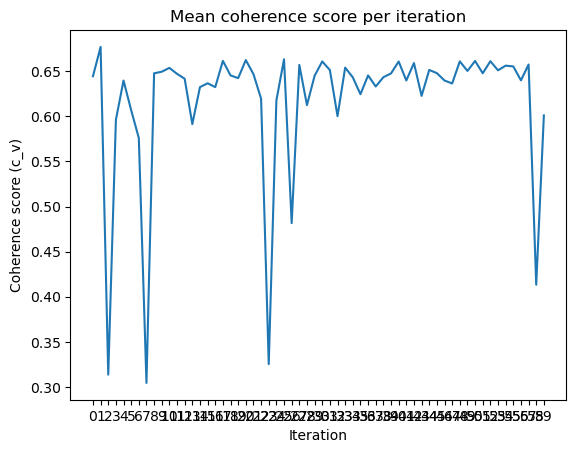

0.6769124142812186


In [11]:
plt.xlabel('Iteration')
plt.ylabel('Coherence score (c_v)')
plt.title('Mean coherence score per iteration')

coherences = results['dict_model_runs']['Coherence']

mean_coherences = [np.mean(coherences[key]) for key in coherences.keys()]

plt.plot(mean_coherences)
plt.xticks(range(len(mean_coherences)))
plt.show()

print(np.max(mean_coherences))

max_index = np.argmax(mean_coherences)

In [12]:
num_topics = results["x_iters"]["num_topics"][max_index]
lr = results["x_iters"]["lr"][max_index]
momentum = results["x_iters"]["momentum"][max_index]
num_neurons = results["x_iters"]["num_neurons"][max_index]

print("Optimal number of topics: ", num_topics)
print("Optimal learning rate: ", lr)
print("Optimal momentum: ", momentum)
print("Optimal number of neurons: ", num_neurons)

Optimal number of topics:  8
Optimal learning rate:  0.0030404428952763947
Optimal momentum:  0.9940709165578047
Optimal number of neurons:  249


Now we're ready to train it. Note that the output of a topic model comes as a dictionary composed of 4 elements:


*   *topics*: the list of word topics
*   *topic-word-matrix*: the distribution of the words of the vocabulary for each topic (dimensions: |num topics| x |vocabulary|)
*   *topic-document-matrix*: the distribution of the topics for each document of the training set (dimensions: |num topics| x |training documents|)
*   *test-document-topic-matrix*: the distribution of the topics for each document of the testing set (dimensions: |num topics| x |test documents|)


In [13]:
model = ProdLDA(num_topics = num_topics, 
               activation = 'softplus', 
               dropout = 0.2,
               learn_priors = True, 
               batch_size = 64, 
               lr = lr,
               momentum = momentum,
               solver = 'adam', 
               num_epochs = 100, 
               reduce_on_plateau = False, 
               prior_mean = 0.0,
               prior_variance = None, 
               num_layers = 2, 
               num_neurons = num_neurons, 
               num_samples = 10,
               use_partitions = True)

In [14]:
coherence_list, topic_diversity_list, models_opt = [], [], []

for i in range(NUM_ITERS):
  output = model.train_model(dataset, top_words=10)
  models_opt.append(output)
  coherence_list.append(ch_score := ch.score(output))
  topic_diversity_list.append(td_score := td.score(output))



print("Mean coherence: ", np.mean(coherence_list), "\nMean topic diversity: ", np.mean(topic_diversity_list))

Epoch: [1/100]	Samples: [1487/148700]	Train Loss: 1368.771083767653	Time: 0:00:00.853551
Epoch: [1/100]	Samples: [319/31900]	Validation Loss: 1309.1783160266457	Time: 0:00:00.035900
Epoch: [2/100]	Samples: [2974/148700]	Train Loss: 1341.7698806321453	Time: 0:00:00.299765
Epoch: [2/100]	Samples: [319/31900]	Validation Loss: 1299.0160903213166	Time: 0:00:00.031534
Epoch: [3/100]	Samples: [4461/148700]	Train Loss: 1314.4131719695697	Time: 0:00:00.454923
Epoch: [3/100]	Samples: [319/31900]	Validation Loss: 1280.0500587774295	Time: 0:00:00.037404
Epoch: [4/100]	Samples: [5948/148700]	Train Loss: 1301.1919079942838	Time: 0:00:00.253651
Epoch: [4/100]	Samples: [319/31900]	Validation Loss: 1267.7873236677117	Time: 0:00:00.013780
Epoch: [5/100]	Samples: [7435/148700]	Train Loss: 1291.2470026689643	Time: 0:00:00.126103
Epoch: [5/100]	Samples: [319/31900]	Validation Loss: 1265.47756661442	Time: 0:00:00.034570
Epoch: [6/100]	Samples: [8922/148700]	Train Loss: 1281.3790875084062	Time: 0:00:00.35777

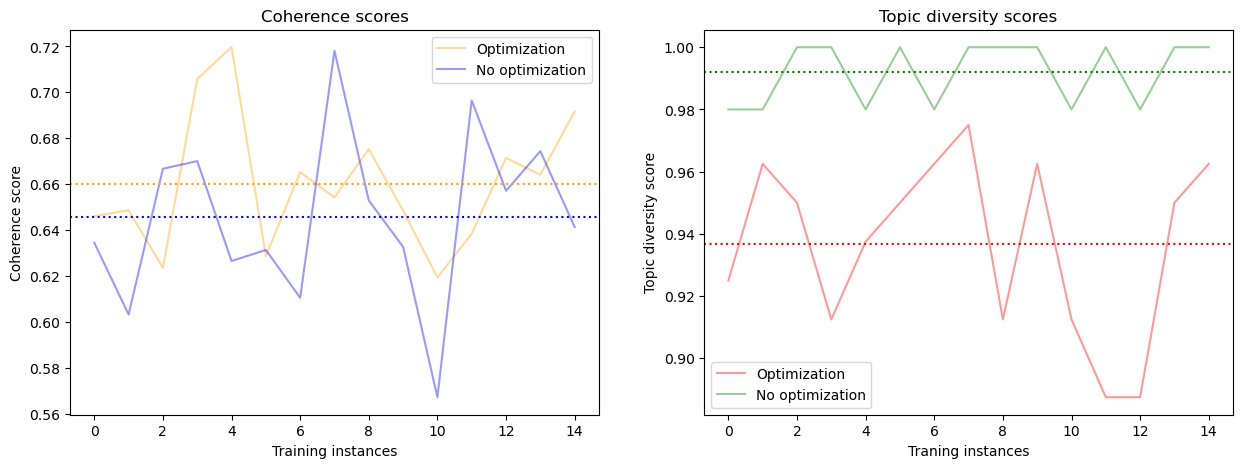

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Coherence scores plot
axs[0].plot(coherence_list, label="Optimization", color = 'orange', alpha = 0.4)
axs[0].plot(coherence_list_no_opt, label="No optimization", color = 'blue', alpha = 0.4)
axs[0].axhline(y=np.mean(coherence_list), color='orange', linestyle=':')
axs[0].axhline(y=np.mean(coherence_list_no_opt), color='blue', linestyle=':')
axs[0].set_title("Coherence scores")
axs[0].set_xlabel("Training instances")
axs[0].set_ylabel("Coherence score")
axs[0].legend()

# Topic diversity scores plot
axs[1].plot(topic_diversity_list, label="Optimization", color = 'r', alpha = 0.4)
axs[1].plot(topic_diversity_list_no_opt, label="No optimization", color = 'g', alpha = 0.4)
axs[1].axhline(y=np.mean(topic_diversity_list), color='r', linestyle=':')
axs[1].axhline(y=np.mean(topic_diversity_list_no_opt), color='g', linestyle=':')
axs[1].set_title("Topic diversity scores")
axs[1].set_xlabel("Traning instances")
axs[1].set_ylabel("Topic diversity score")
axs[1].legend()

plt.show()




In [19]:
best_output = models_opt[np.argmax([coherence_list[i]  for i in range(len(coherence_list))])]


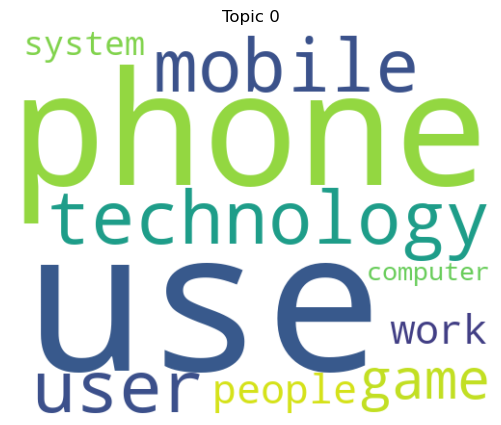

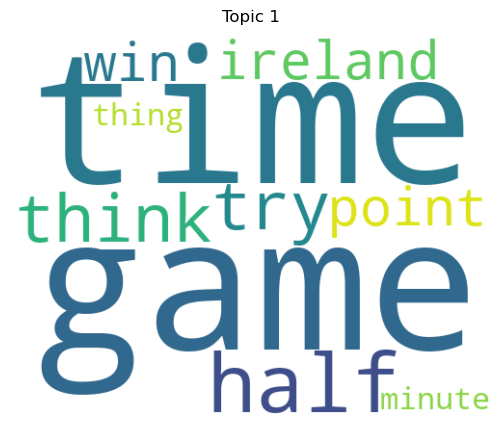

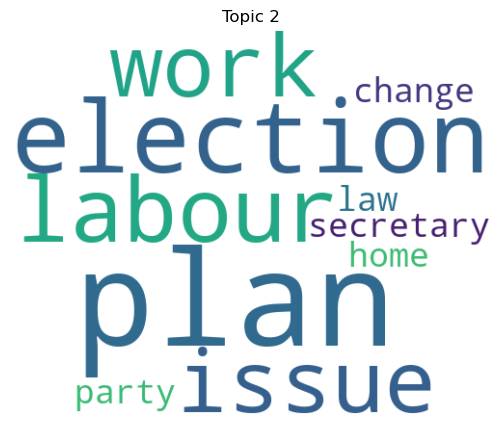

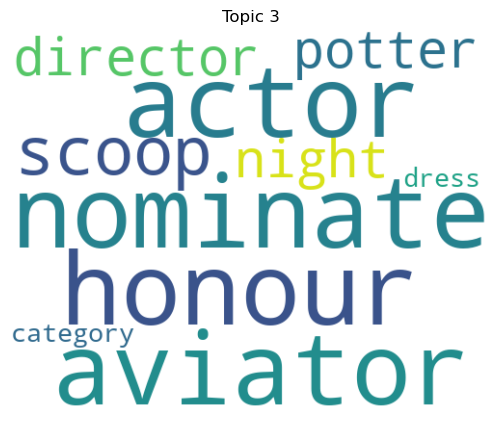

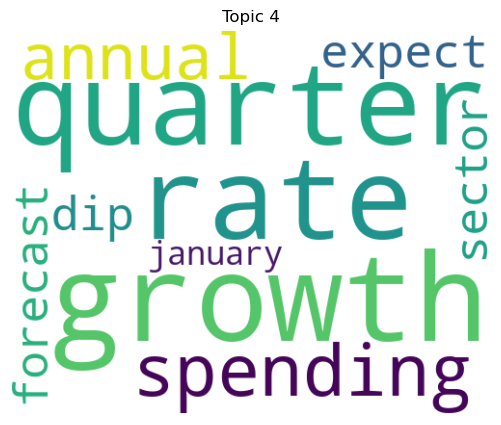

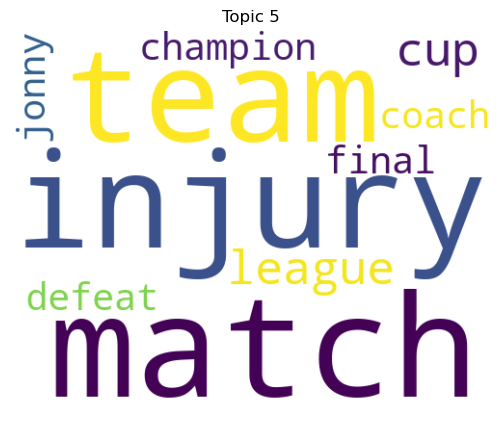

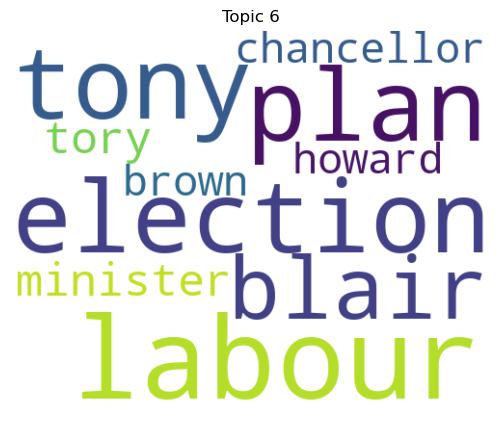

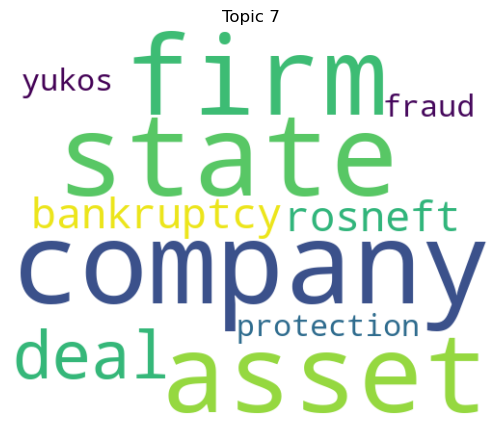

In [20]:
topics = best_output['topics']
for i, topic in enumerate(topics):
  wordcloud = WordCloud(width=500, height=400, background_color='white').generate(" ".join(topic))
  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.title(f"Topic {i}")
  plt.show()

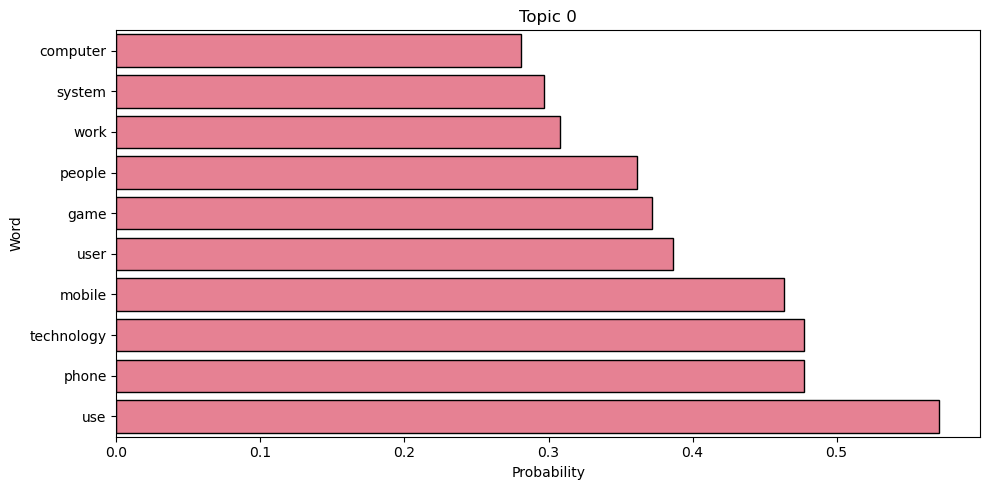

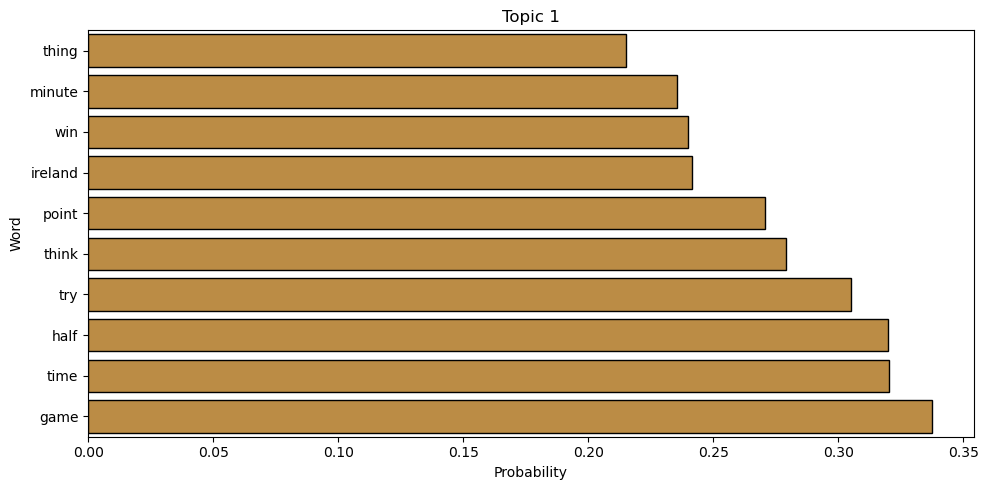

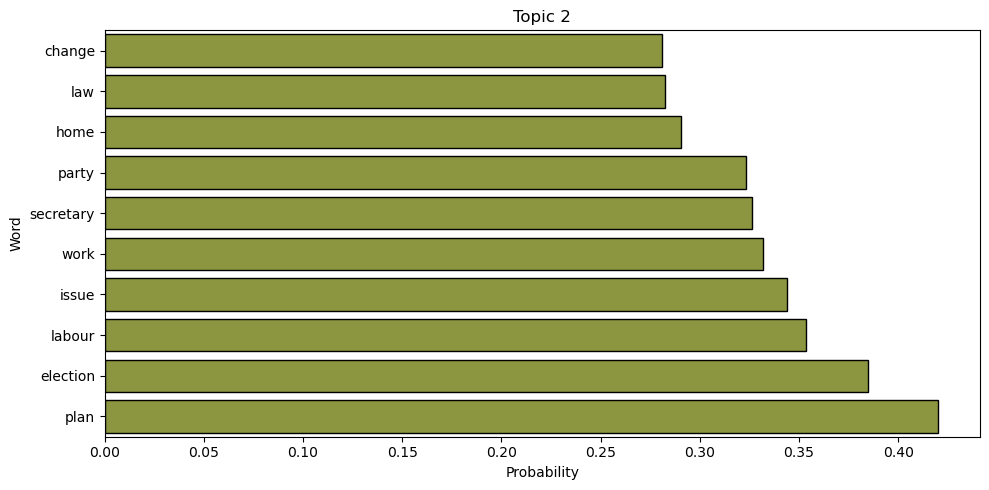

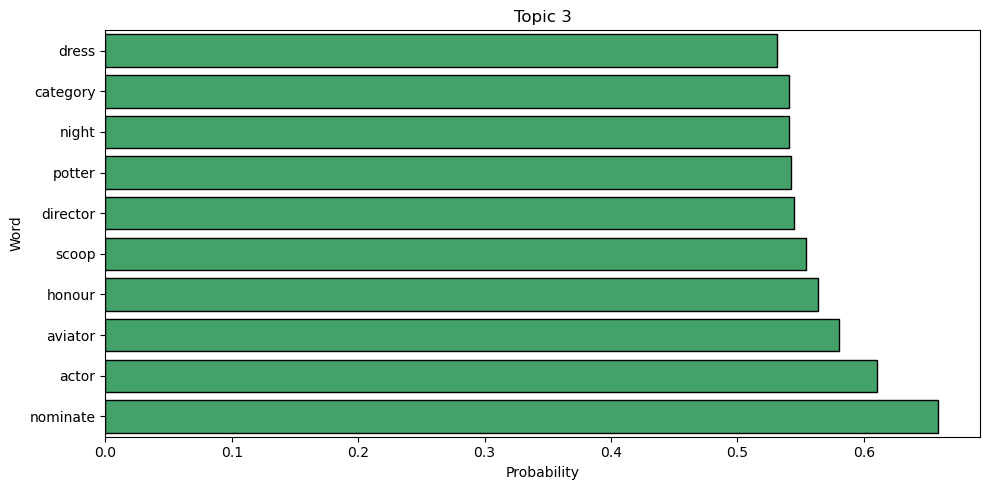

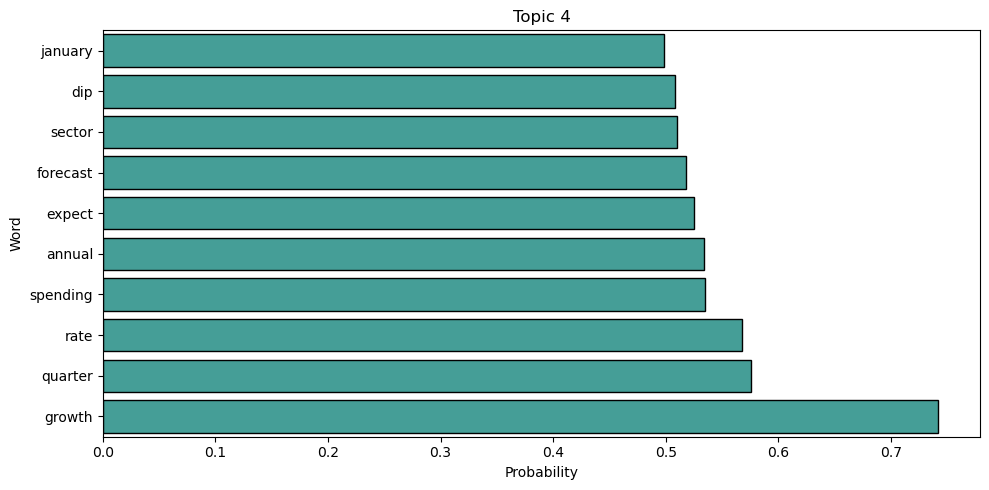

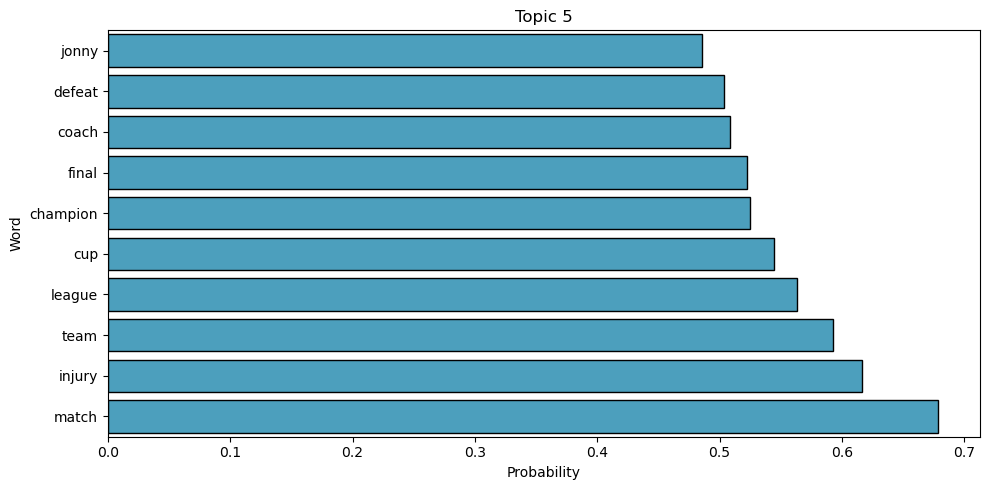

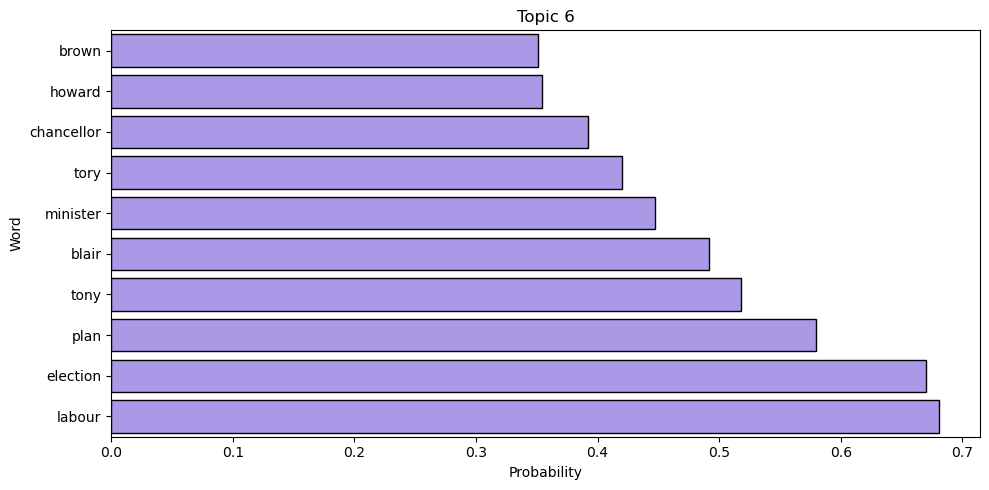

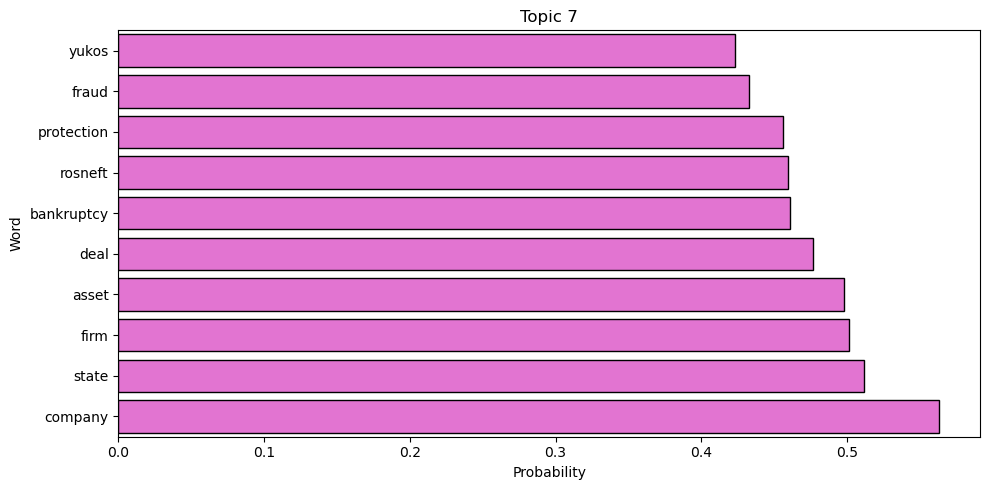

In [21]:
word_frequencies_barplot_dict(best_output)